# EDA

## Importing moduls

And configuting settings

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import sweetviz as sv

from lib.data_viz_functions import *

In [2]:
filterwarnings("ignore")
sns.set()

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

%matplotlib inline

In [3]:
train = pd.read_pickle("data/2022-03-30_train_preprocessed.pkl.zip", compression="zip")
test = pd.read_pickle("data/2022-03-30_test_preprocessed.pkl.zip", compression="zip")

## Feature description

- **body_type** - Type of vehicle body (седан, купе, хэтчбек...)  
- **brand** - Manufacture name (bmw, audi...)  
- **color** - Main car's body color  
- **description** - Seller's car description  
- **engine_displacement** - Volume of car's engine (nan if electro)  
- **engine_power** - Engine power in horse powers  
- **fuel_type** - Fuel type (diesel, gasoline, electro...)  
- **km_age** - Vehicle mileage  
- **model_year** - Year when model production was started  
- **number_of_doors** - Number of doors  
- **production_year** - Production year of this car  
- **vehicle_transmission** - Transmission type (auto, robot, mech...)  
- **vendor** - Origin country of brand (EUROPIAN, CHINEESE...)  
- **oweners** - Count of oweners of car  
- **owenership_duration** - Owenership duration  
- **ptc** - Vehicle Registration Certificate (YES, NO, DUP)  
- **drive** - Car drive (4WD, FRONT, REAR)  
- **wheel** - Wheel position in car (RIGHT, LEFT)  
- **price** - Our target column - Car Price  

### Dicts and Lists block

In [4]:
valid_columns_dict = {
    "bodyType": "body_type",
    "engineDisplacement": "engine_displacement",
    "enginePower": "engine_power",
    "fuelType": "fuel_type",
    "mileage": "km_age",
    "modelDate": "model_year",
    "numberOfDoors": "number_of_doors",
    "productionDate": "production_year",
    "vehicleTransmission": "vehicle_transmission",
    "Владельцы": "owners",
    "Владение": "ownership_duration",
    "ПТС": "ptc",
    "Привод": "drive",
    "Руль": "wheel",
}

In [5]:
def get_nans_in_percents(df):
    nans = df.isna().sum() / df.shape[0] * 100
    return nans[nans > 0]

### Changing columns names to english and snake-type (from dict)

In [6]:
train.rename(columns=valid_columns_dict, inplace=True)
test.rename(columns=valid_columns_dict, inplace=True)

## Grouping cols as categorical and numeric

In [7]:
cat_cols = [
    "body_type",
    "brand",
    "color",
    "fuel_type",
    "number_of_doors",
    "vehicle_transmission",
    "vendor",
    "owners",
    "ptc",
    "drive",
    "wheel",
]
nums_cols = [
    "engine_displacement",
    "engine_power",
    "km_age",
    "model_year",
    "production_year",
    "ownership_duration",
]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121420 entries, 0 to 89377
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   body_type             121418 non-null  object 
 1   brand                 121420 non-null  object 
 2   color                 121420 non-null  object 
 3   description           118208 non-null  object 
 4   engine_displacement   121237 non-null  float64
 5   engine_power          121418 non-null  float64
 6   fuel_type             121419 non-null  object 
 7   km_age                115643 non-null  float64
 8   model_year            121418 non-null  float32
 9   number_of_doors       121418 non-null  float32
 10  production_year       121420 non-null  float32
 11  vehicle_transmission  121418 non-null  object 
 12  vendor                121420 non-null  object 
 13  owners                105108 non-null  float32
 14  ownership_duration    34929 non-null   float64
 15  p

## Discovering NA

In [9]:
get_nans_in_percents(train)

body_type                0.001647
description              2.645363
engine_displacement      0.150717
engine_power             0.001647
fuel_type                0.000824
km_age                   4.757865
model_year               0.001647
number_of_doors          0.001647
vehicle_transmission     0.001647
owners                  13.434360
ownership_duration      71.232911
ptc                      5.044474
drive                    4.759512
wheel                    4.758689
dtype: float64

In [10]:
get_nans_in_percents(test)

engine_displacement     0.158565
ownership_duration     65.418324
ptc                     0.002883
dtype: float64

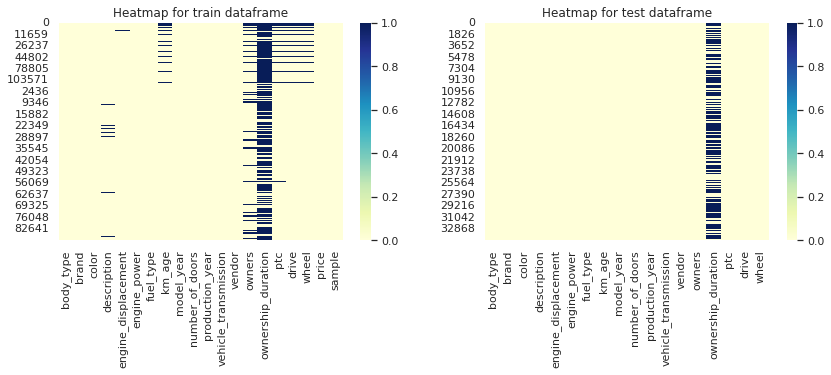

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.heatmap(train.isna(), cmap="YlGnBu", ax=ax[0]).set_title(
    "Heatmap for train dataframe"
)
sns.heatmap(test.isna(), cmap="YlGnBu", ax=ax[1]).set_title(
    "Heatmap for test dataframe"
)
plt.show()

## Numeric variables overview

In [12]:
describe_nums(train[nums_cols + ["price"]])

,unique,n/a count,count,mean,std,min,25%,50%,75%,max
km_age,28798,5777,115643.000000,140171.484085,99705.133331,0.000000,69000.000000,132763.000000,196500.000000,1000000.000000
price,13375,0,121420.000000,1535833.027780,2135761.894566,16000.000000,400000.000000,800000.000000,1805000.000000,99000000.000000
ownership_duration,536,86491,34929.000000,1680.543932,1309.496356,0.000000,701.000000,1305.000000,2404.000000,15615.000000
engine_power,408,2,121418.000000,178.227166,86.141037,11.000000,120.000000,150.000000,218.000000,800.000000
production_year,81,0,121420.000000,2011.312256,7.062328,1904.000000,2007.000000,2012.000000,2017.000000,2021.000000
model_year,80,2,121418.000000,2009.077881,7.398053,1904.000000,2005.000000,2010.000000,2015.000000,2021.000000
engine_displacement,67,183,121237.000000,2.254003,0.904358,0.700000,1.600000,2.000000,2.500000,8.400000


Unique values count: 67 
Q1: 1.6
Q3: 2.5
IQR: 0.8999999999999999 
Outliers borders: [0.2500000000000002, 3.8499999999999996]


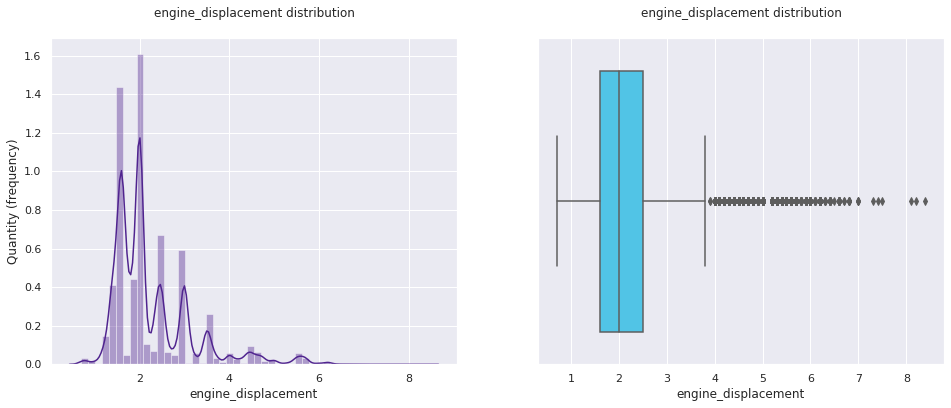

Unique values count: 408 
Q1: 120.0
Q3: 218.0
IQR: 98.0 
Outliers borders: [-27.0, 365.0]


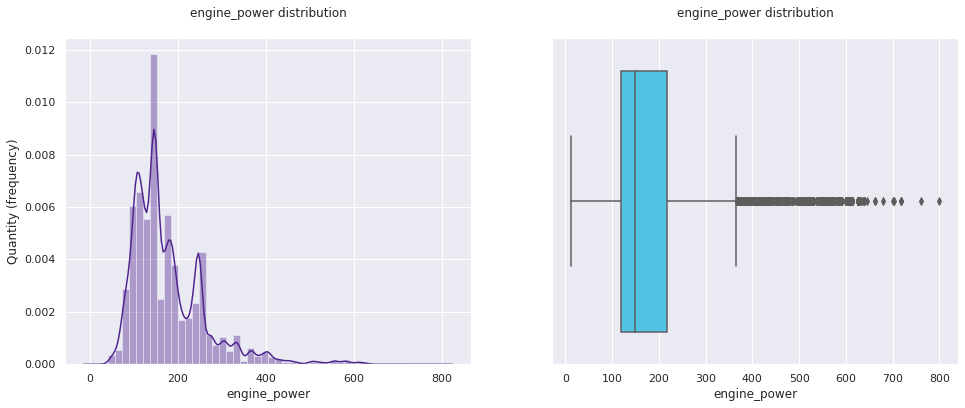

Unique values count: 28798 
Q1: 69000.0
Q3: 196500.0
IQR: 127500.0 
Outliers borders: [-122250.0, 387750.0]


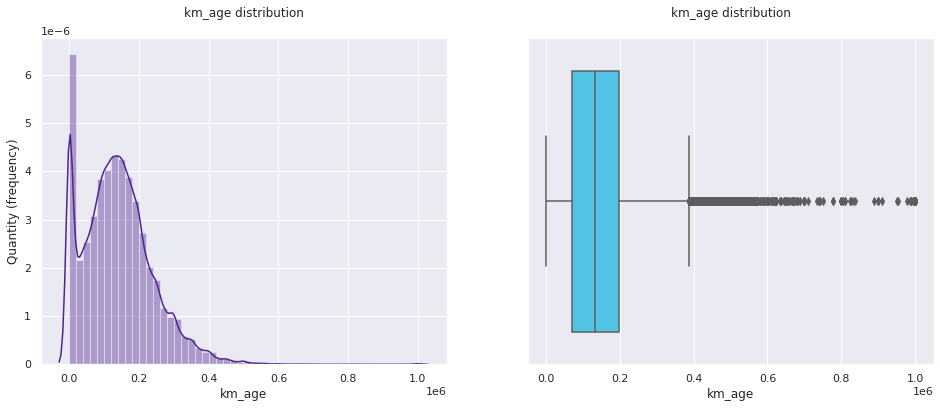

Unique values count: 80 
Q1: 2005.0
Q3: 2015.0
IQR: 10.0 
Outliers borders: [1990.0, 2030.0]


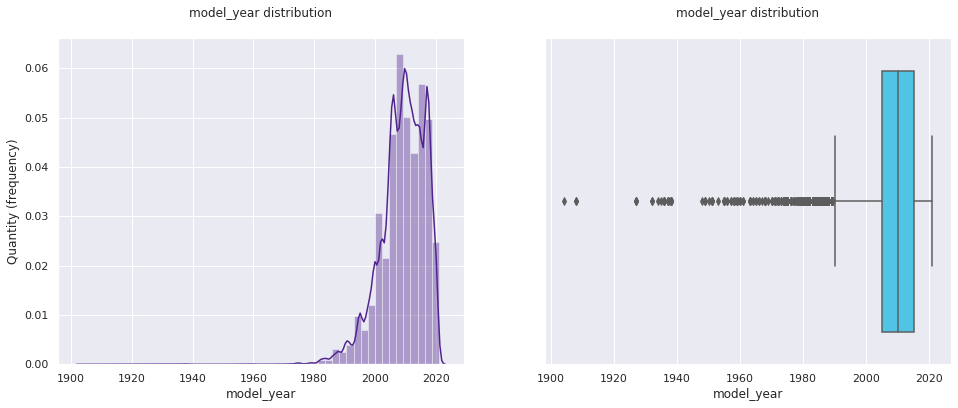

Unique values count: 81 
Q1: 2007.0
Q3: 2017.0
IQR: 10.0 
Outliers borders: [1992.0, 2032.0]


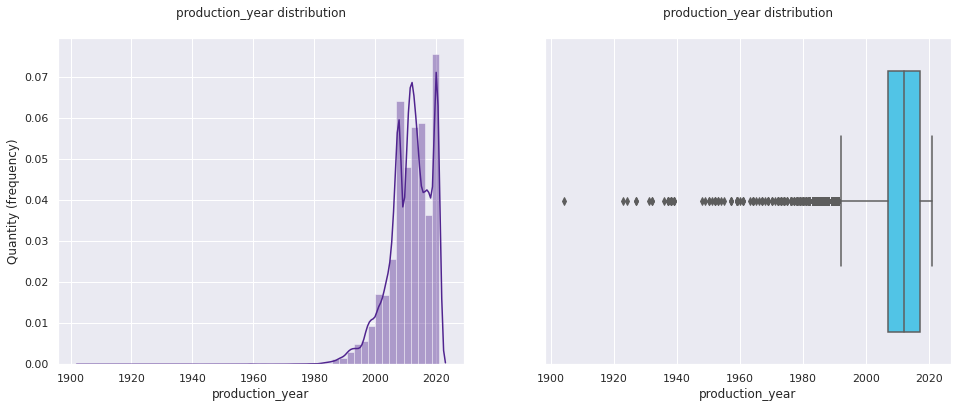

Unique values count: 536 
Q1: 701.0
Q3: 2404.0
IQR: 1703.0 
Outliers borders: [-1853.5, 4958.5]


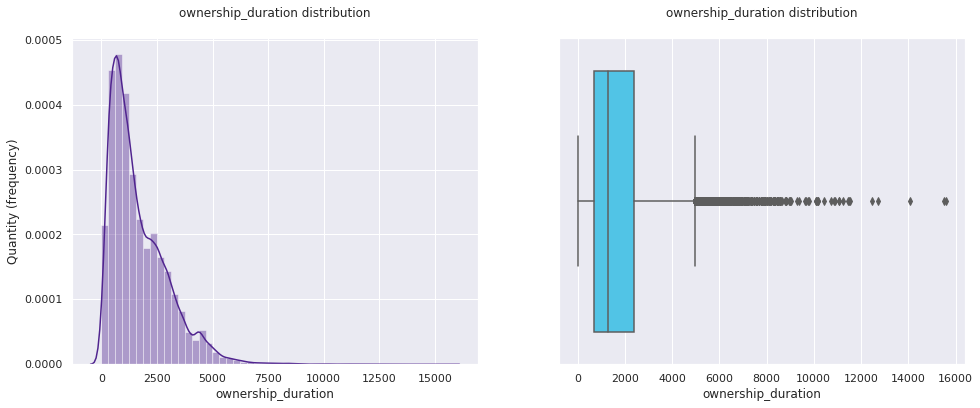

In [13]:
for c in nums_cols:
    show_IQR(train[c])

In [14]:
# for c in nums_cols:
#     show_IQR(test[c])

Unique values count: 35 
Q1: 2.0
Q3: 3.0
IQR: 1.0 
Outliers borders: [0.5, 4.5]


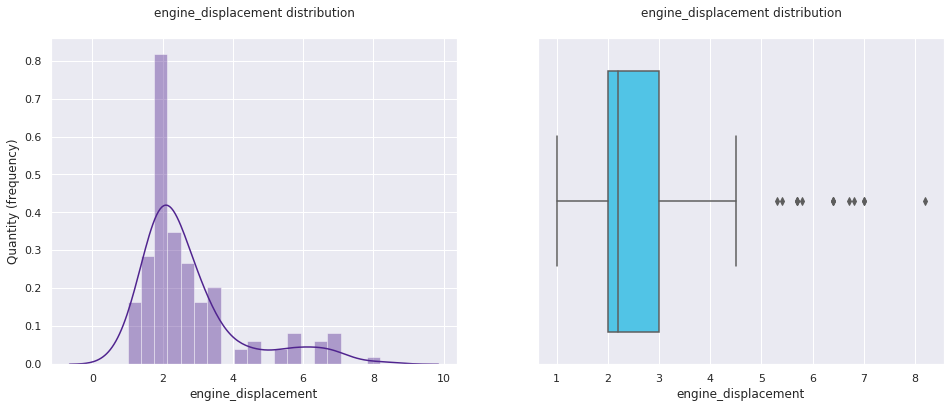

Unique values count: 62 
Q1: 55.0
Q3: 150.0
IQR: 95.0 
Outliers borders: [-87.5, 292.5]


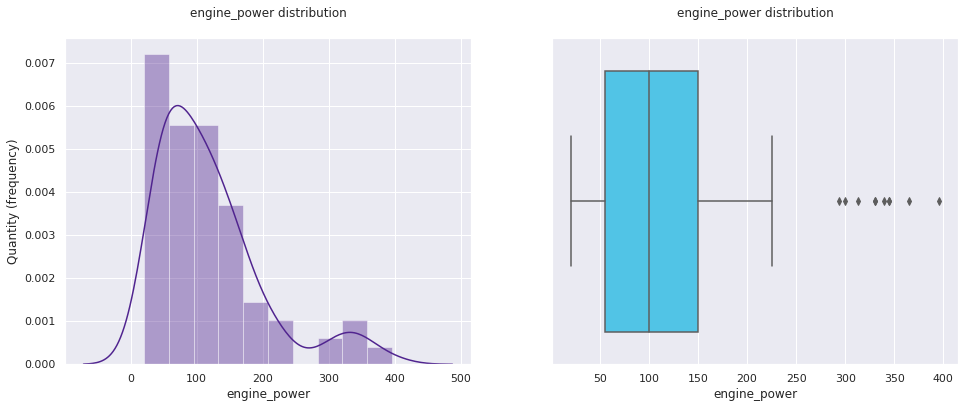

Unique values count: 89 
Q1: 27000.0
Q3: 150000.0
IQR: 123000.0 
Outliers borders: [-157500.0, 334500.0]


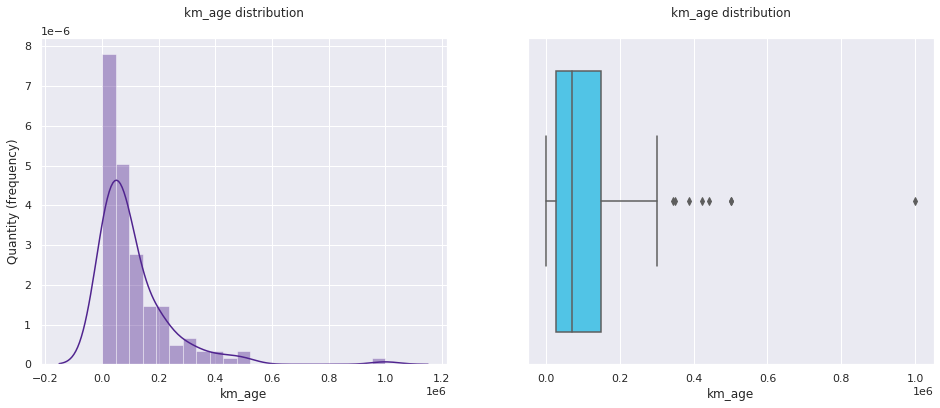

Unique values count: 37 
Q1: 1949.0
Q3: 1972.0
IQR: 23.0 
Outliers borders: [1914.5, 2006.5]


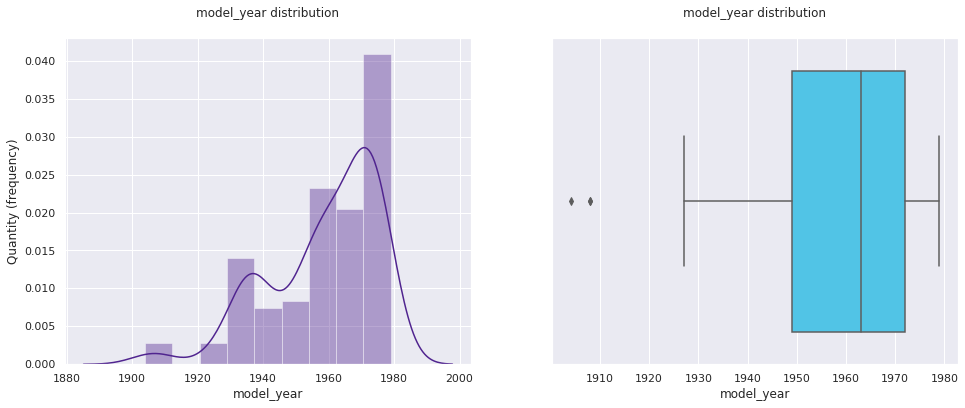

Unique values count: 39 
Q1: 1955.0
Q3: 1976.0
IQR: 21.0 
Outliers borders: [1923.5, 2007.5]


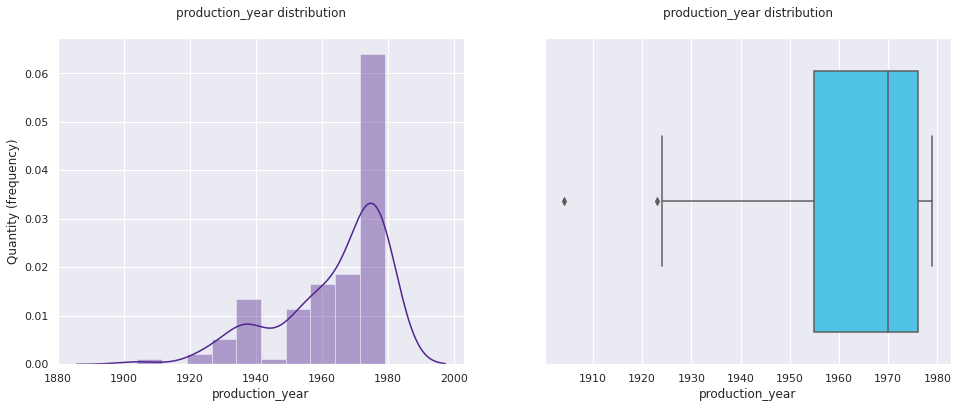

Unique values count: 52 
Q1: 1782.0
Q3: 5692.5
IQR: 3910.5 
Outliers borders: [-4083.75, 11558.25]


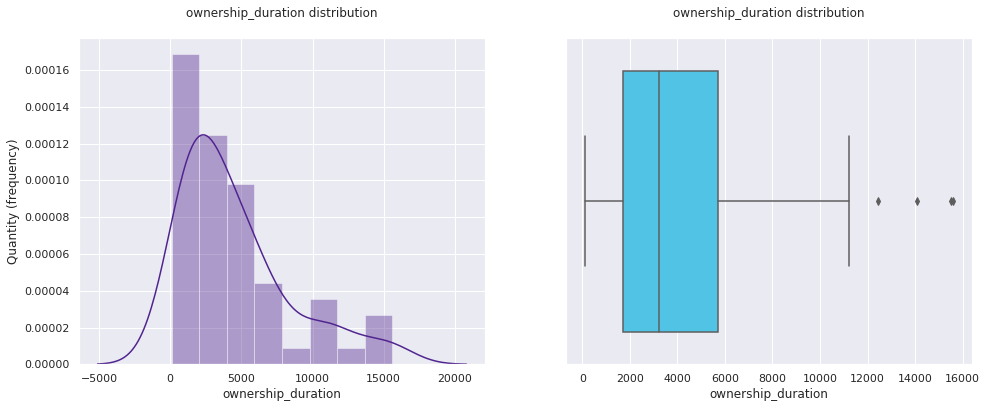

In [15]:
for c in nums_cols:
    show_IQR(train[train["production_year"] < 1980][c])

## Categorical columns overview

In [16]:
train.describe(include="object").T

,count,unique,top,freq
body_type,121418,16,внедорожник,48273
brand,121420,36,MERCEDES,10793
color,121420,16,чёрный,34299
description,118208,108782,рольф северо-запад - это первый мегамолл автом...,244
fuel_type,121419,6,бензин,101135
vehicle_transmission,121418,4,AUTOMATIC,67906
vendor,121420,6,EUROPEAN,60800
ptc,115295,2,Оригинал,100890
drive,115641,3,передний,58354
wheel,115642,2,Левый,111647


In [17]:
train["owners"].astype("object").describe()

count     105108.0
unique         3.0
top            3.0
freq       48555.0
Name: owners, dtype: float64

In [18]:
train[cat_cols].describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
number_of_doors,121418.0,4.540134,0.648085,0.0,4.0,5.0,5.0,5.0
owners,105108.0,2.191632,0.834002,1.0,1.0,2.0,3.0,3.0


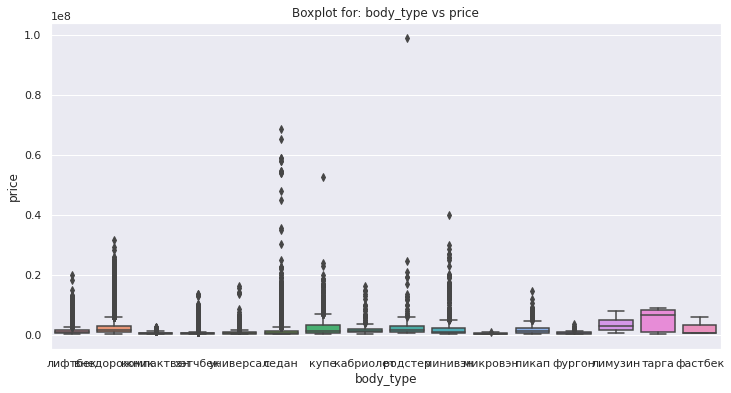

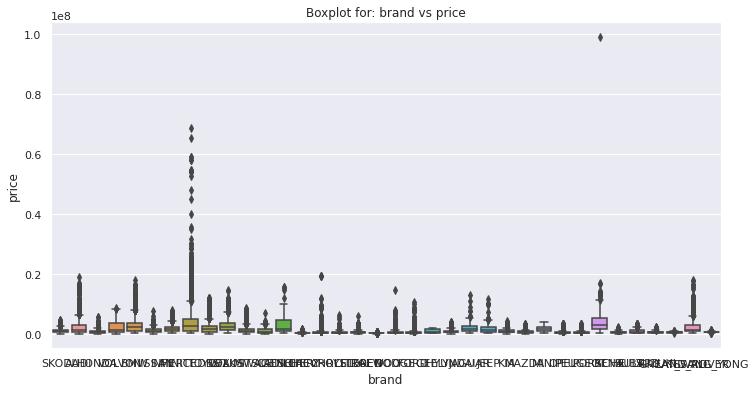

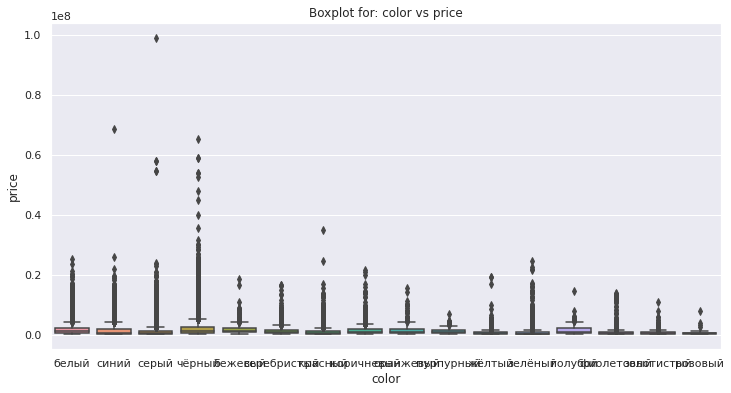

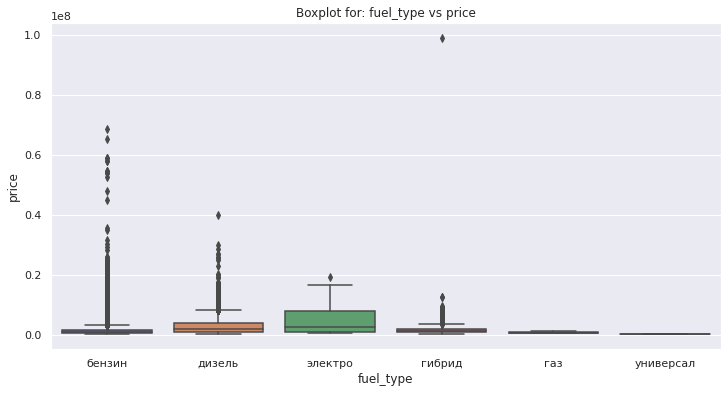

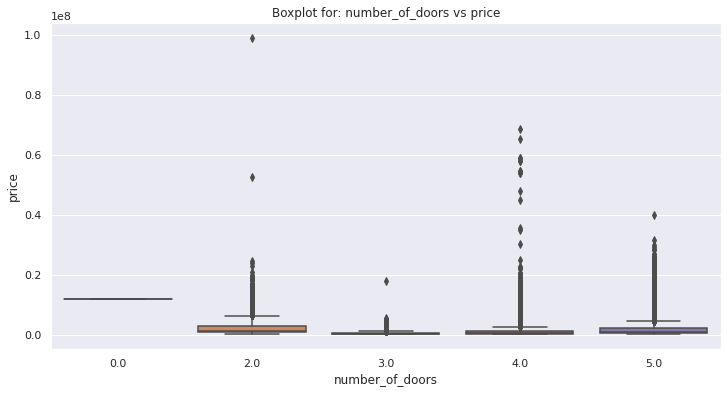

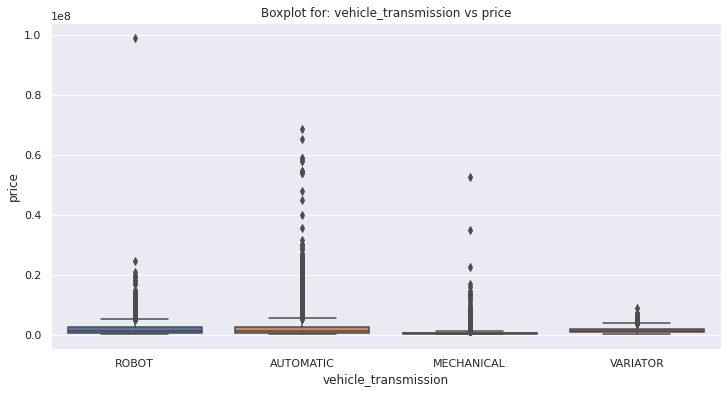

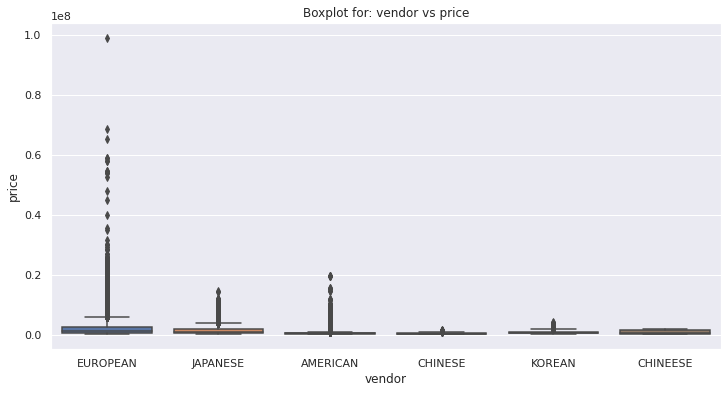

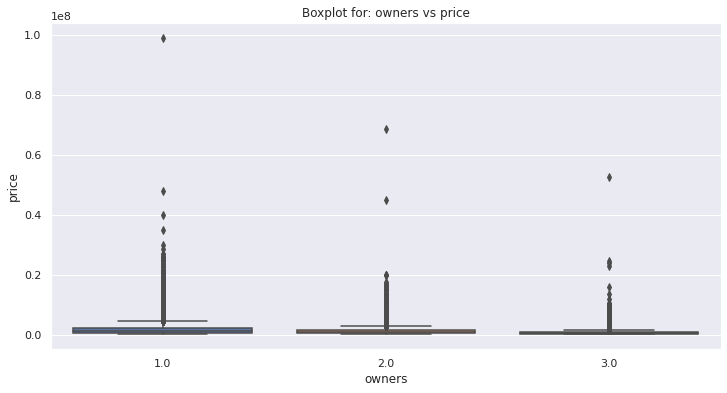

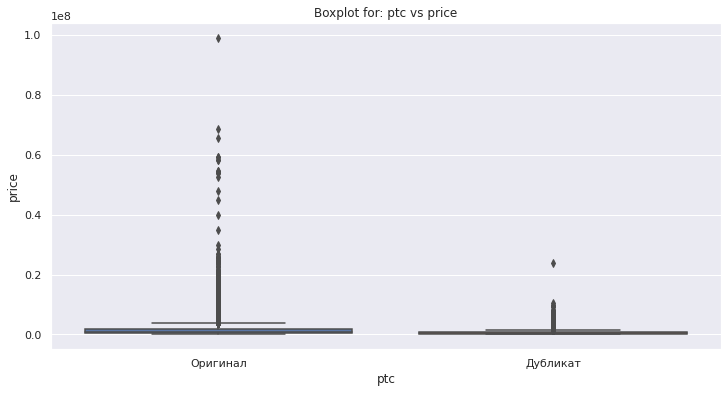

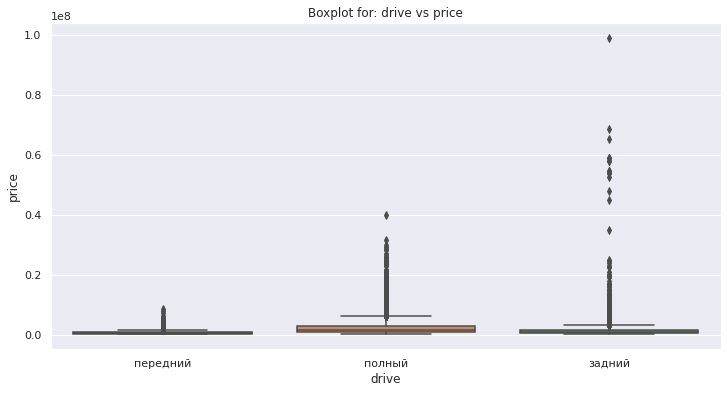

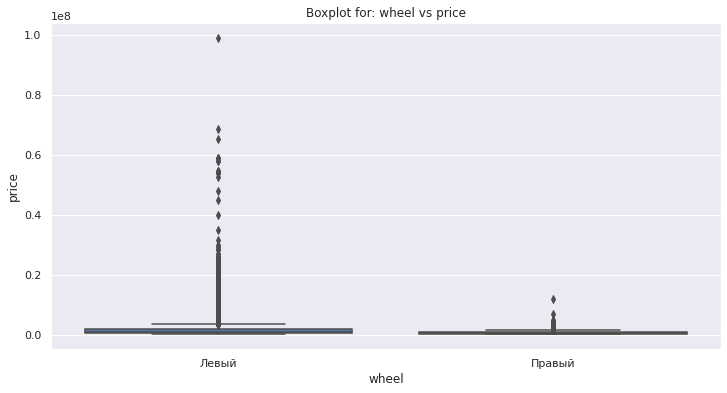

In [19]:
for c in cat_cols:
    show_boxplots(train, c, "price")

## Automated EDA

In [20]:
comp = sv.compare(train, test)

                                             |      | [  0%]   00:00 -> (? left)


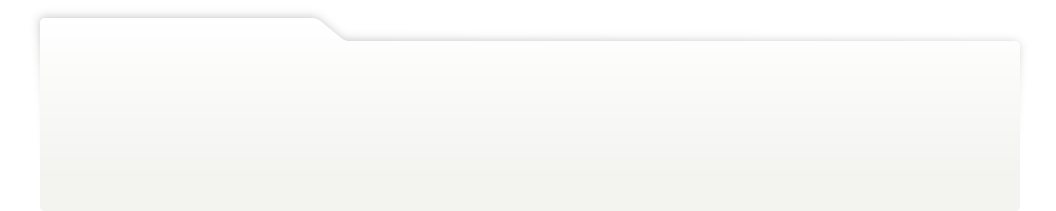
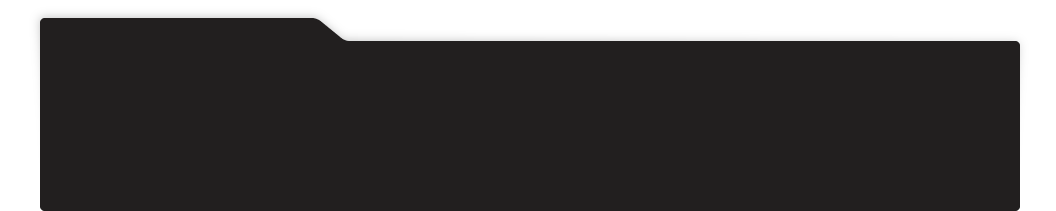
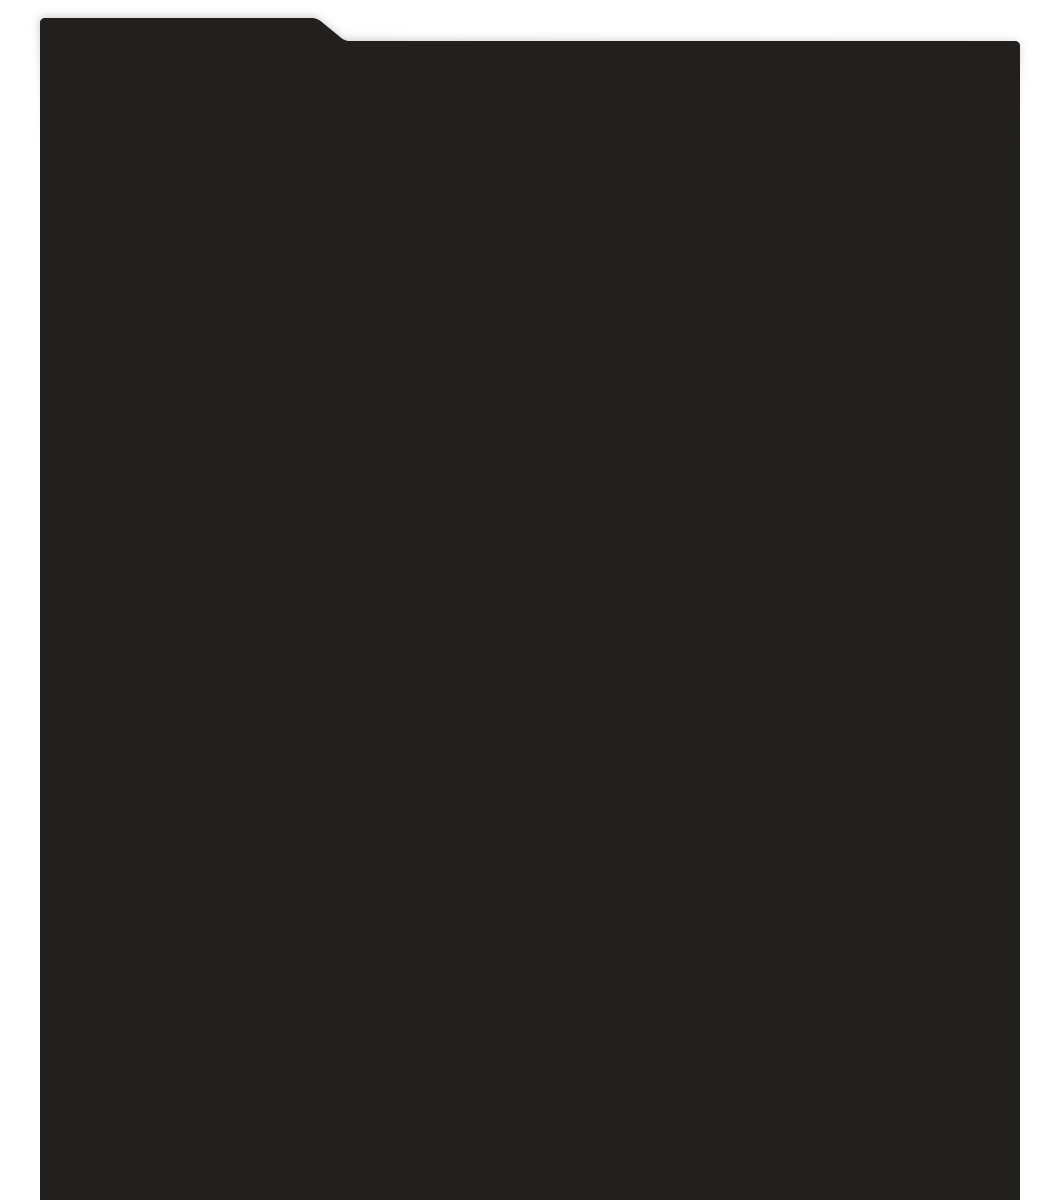
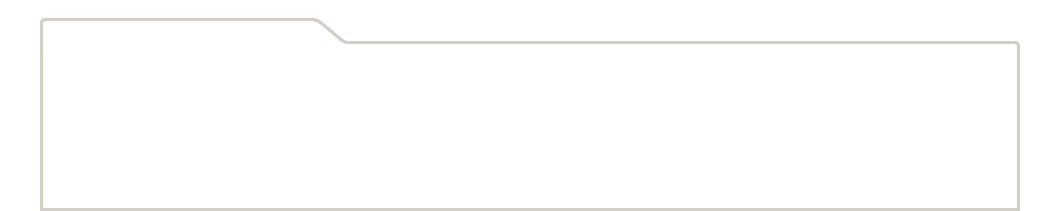
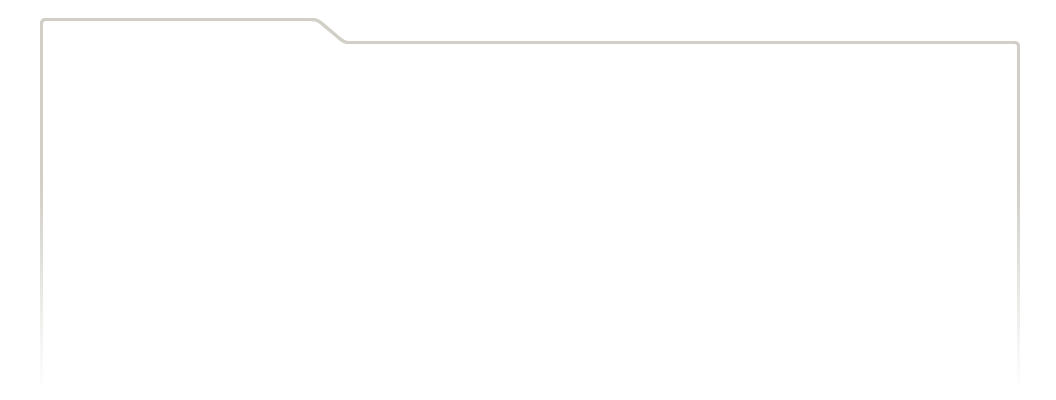
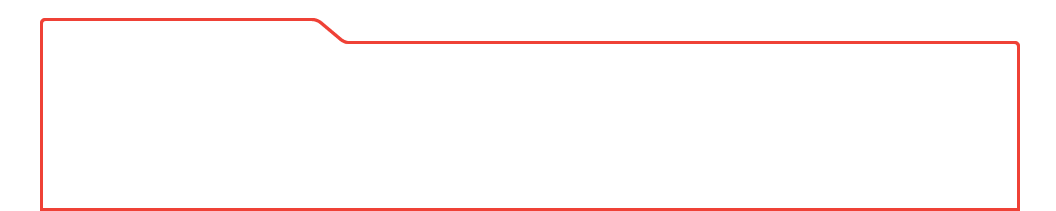
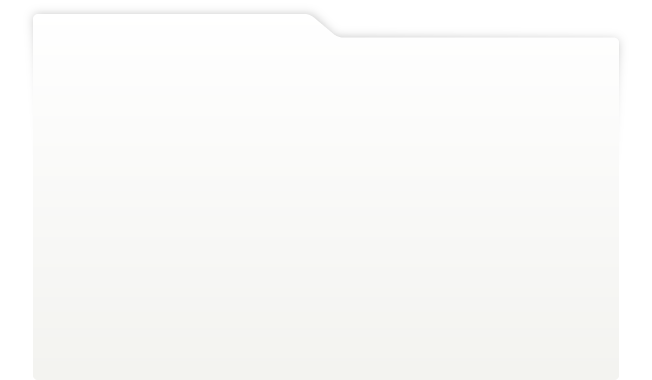
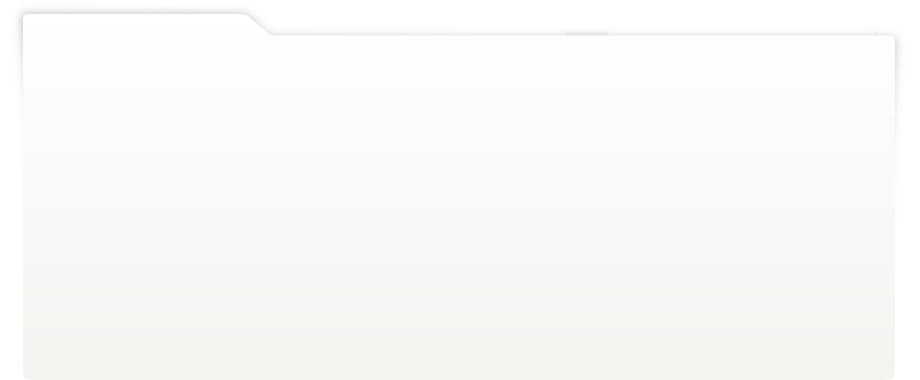
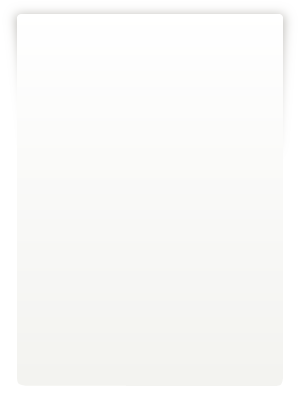
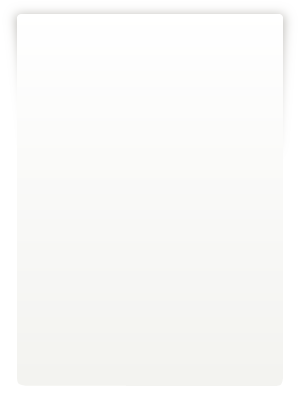
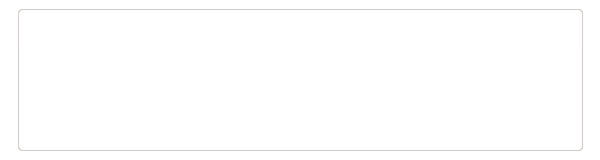
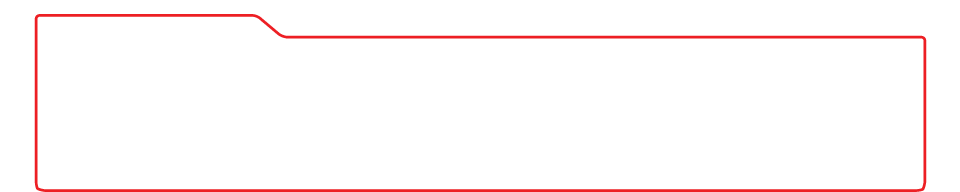
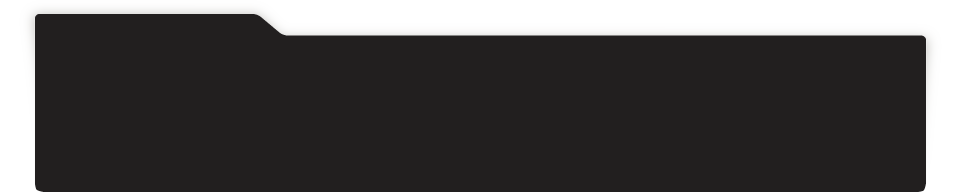
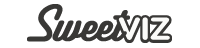
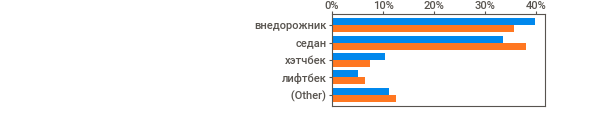
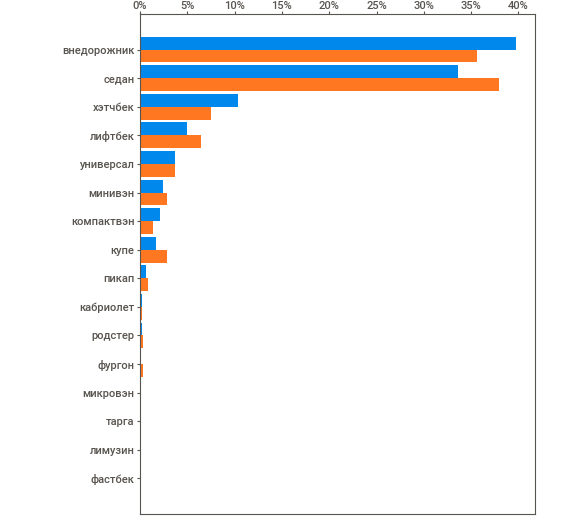
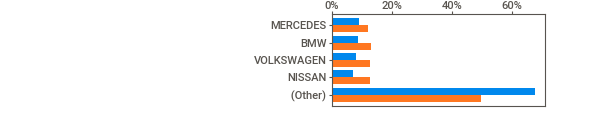
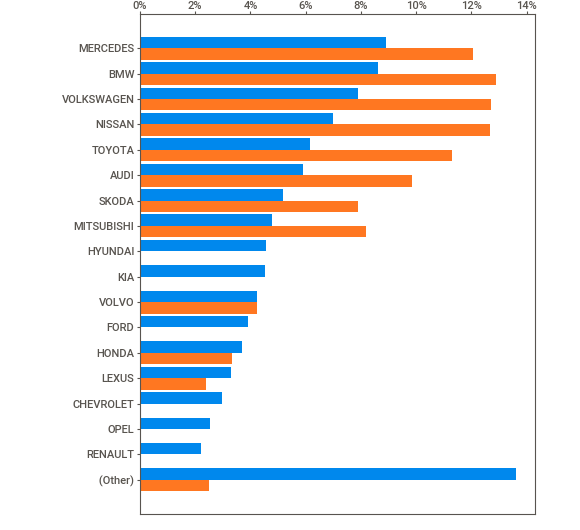
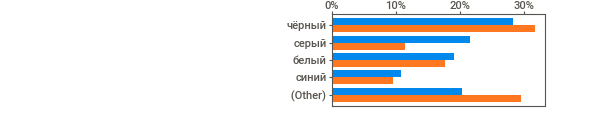
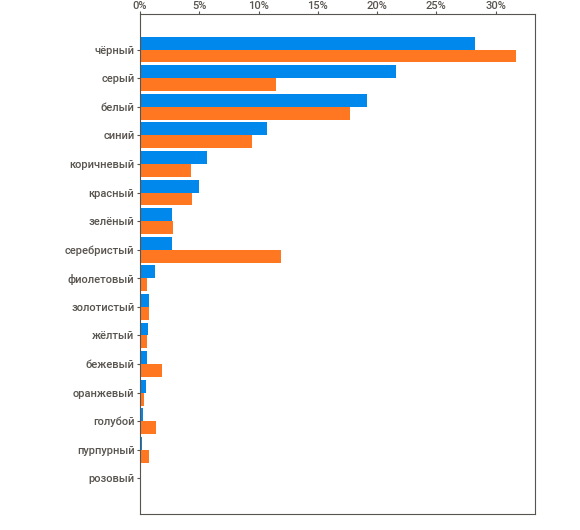
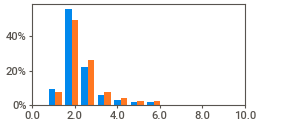
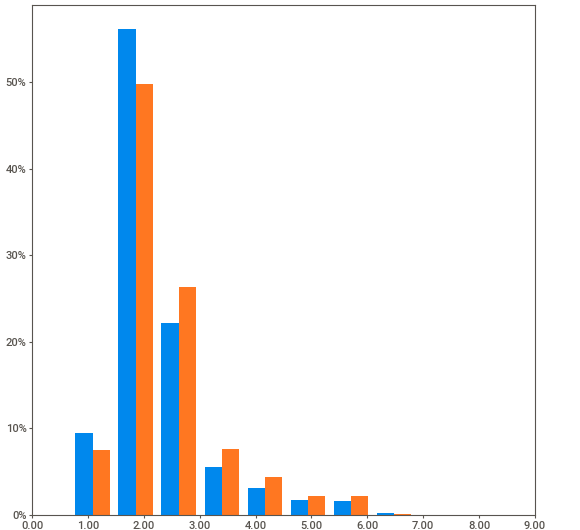
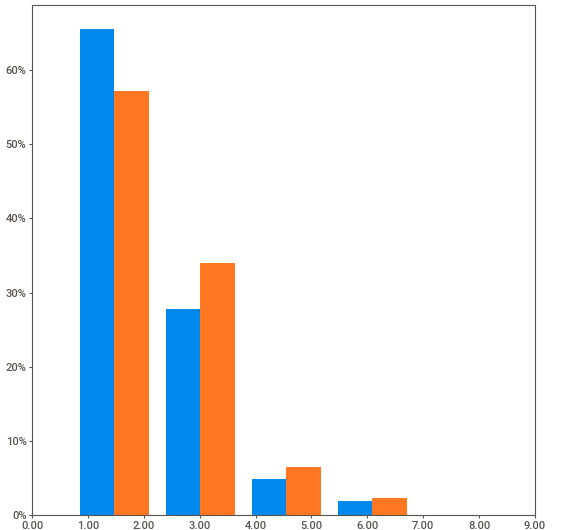
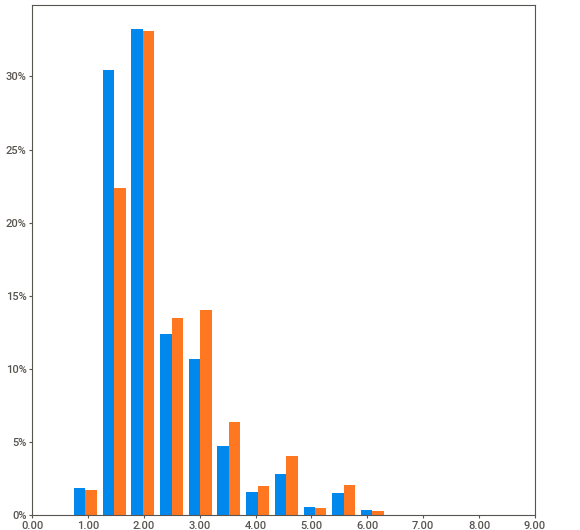
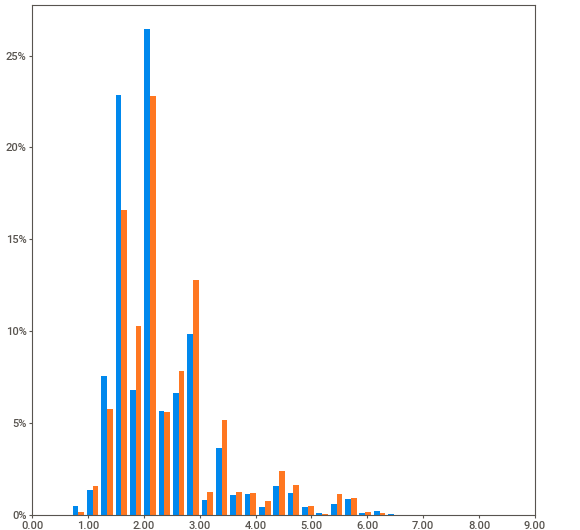
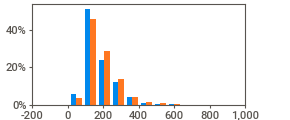
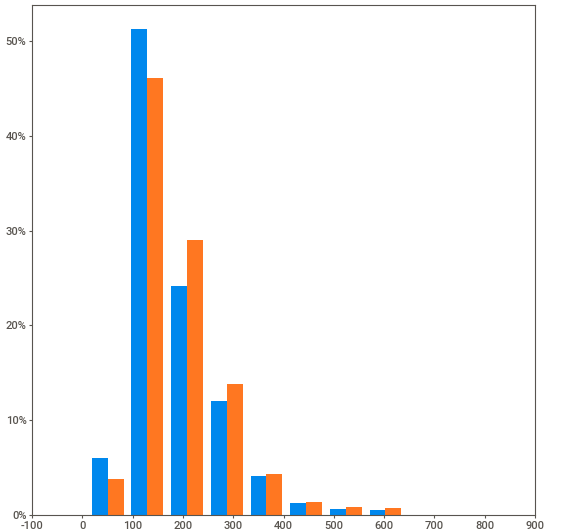
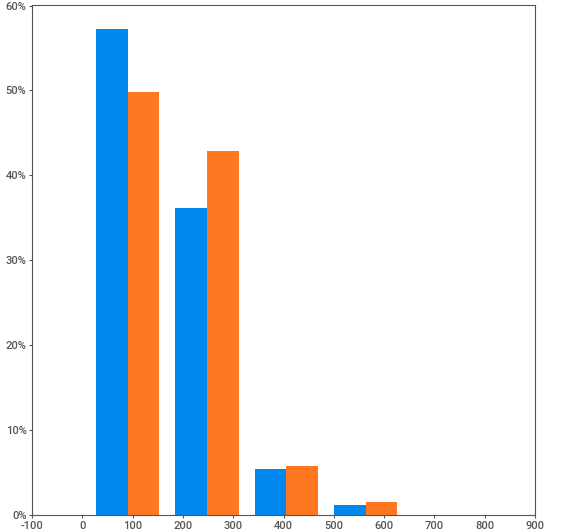
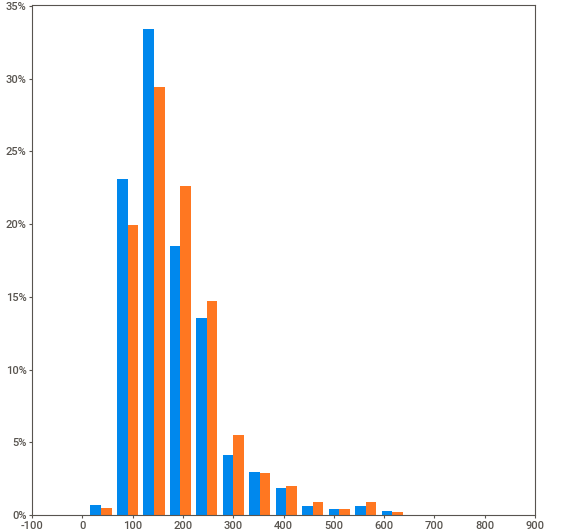
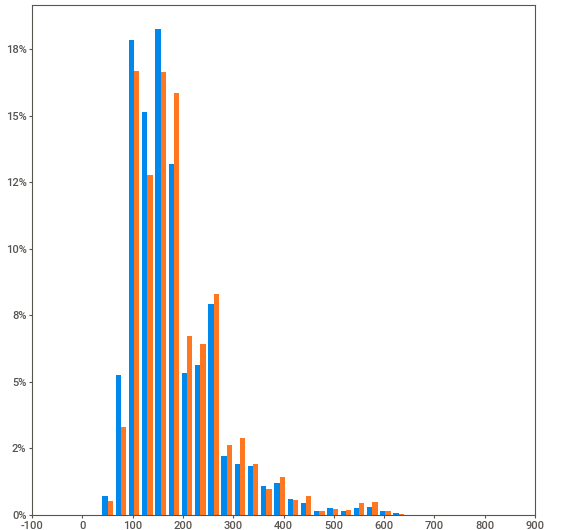
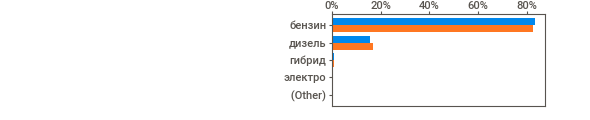
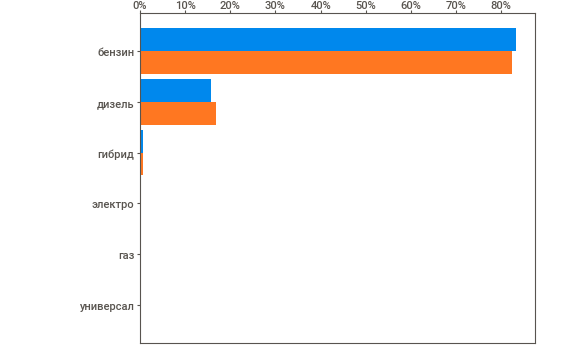
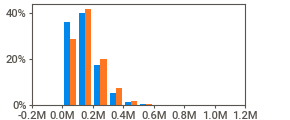
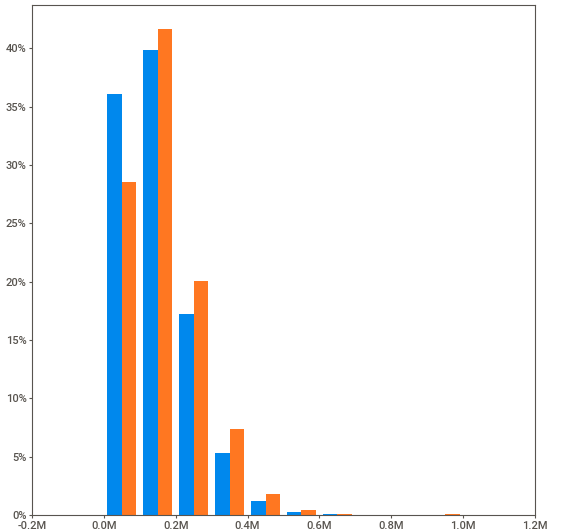
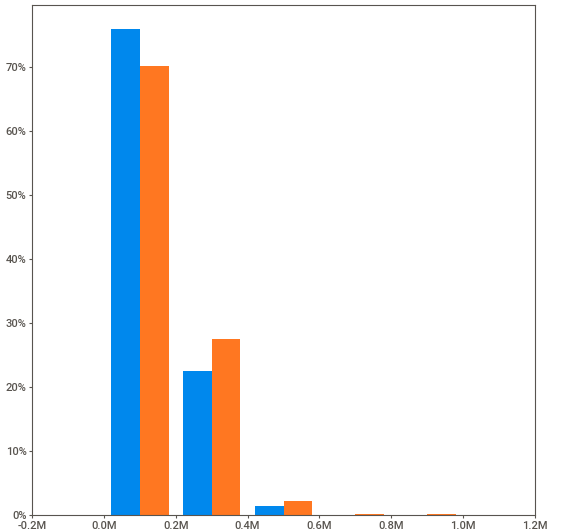
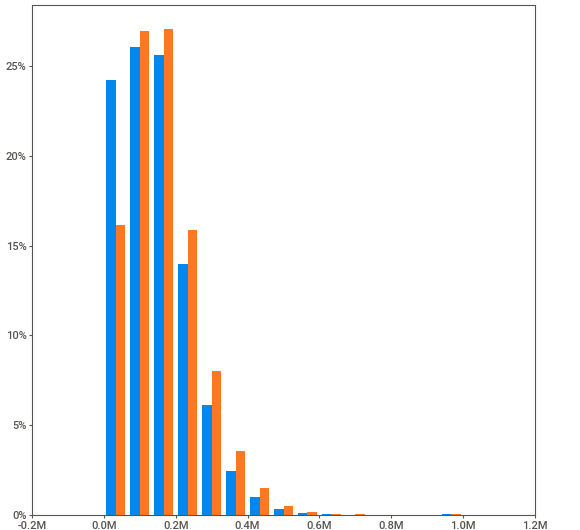
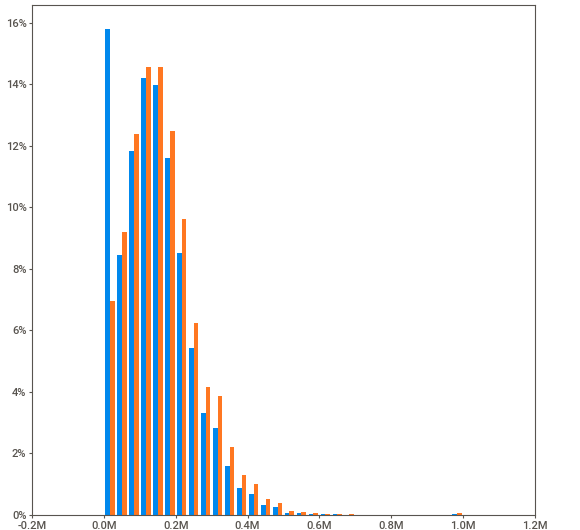
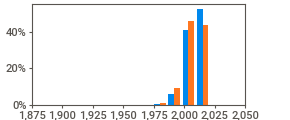
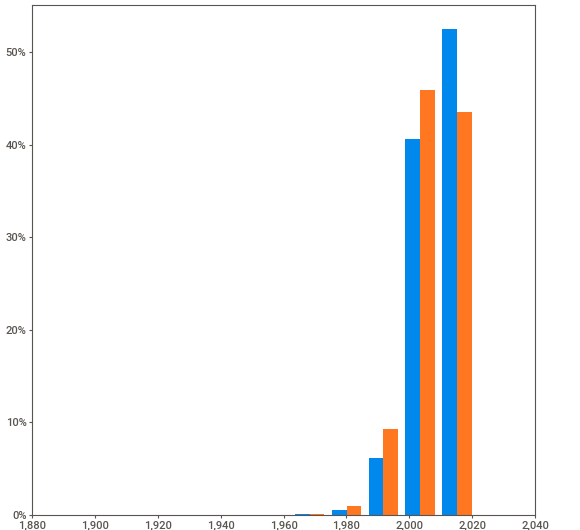
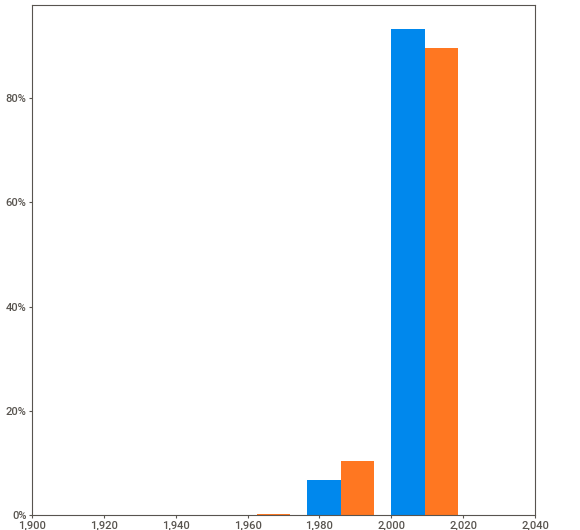
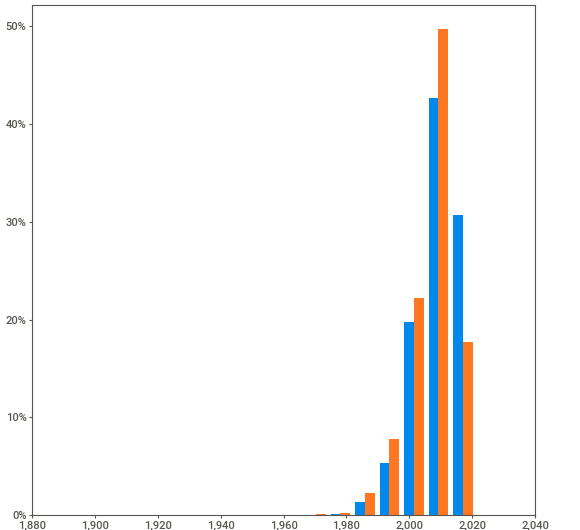
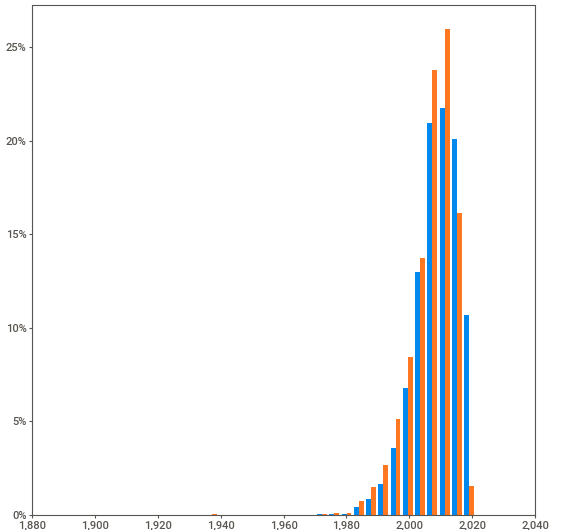
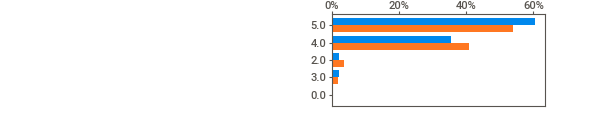
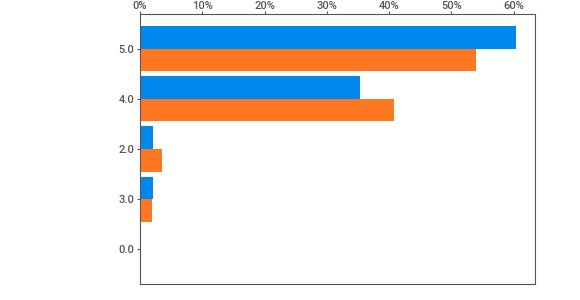
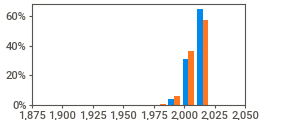
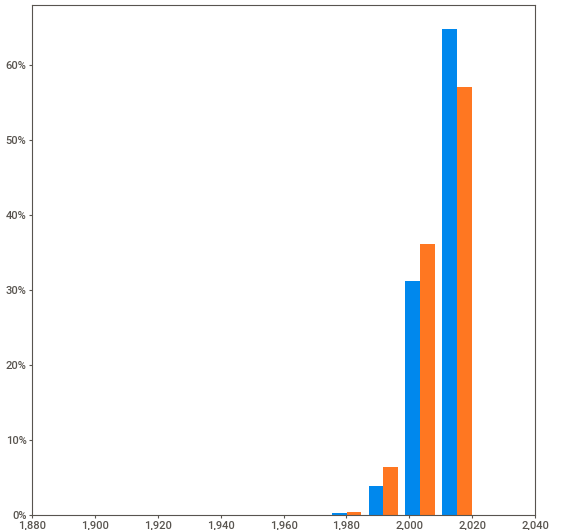
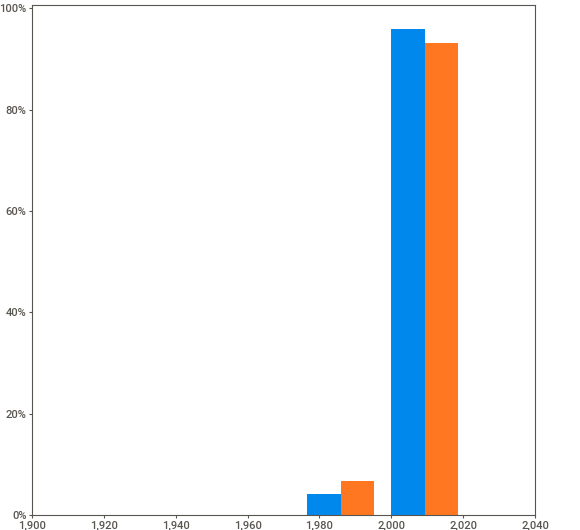
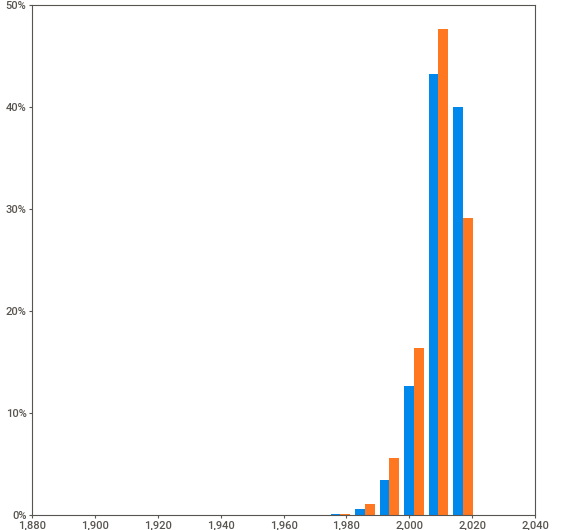
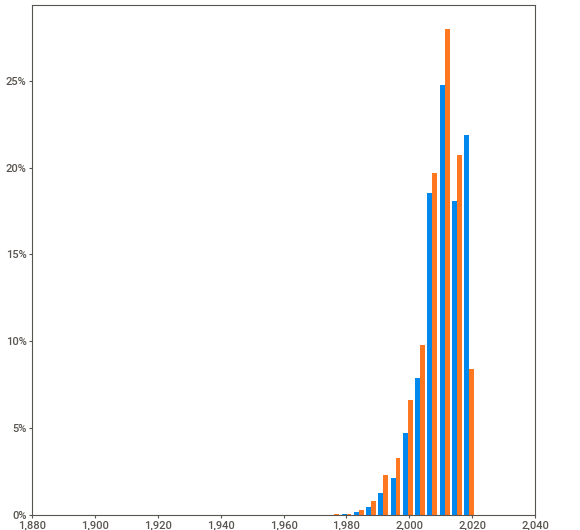
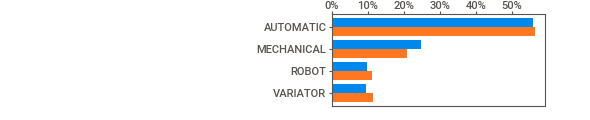
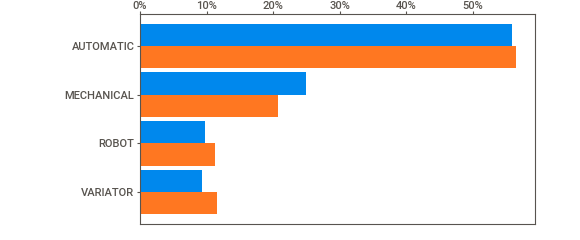
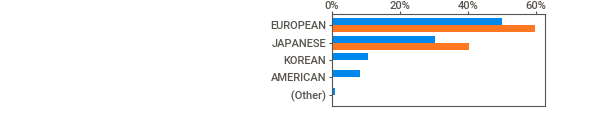
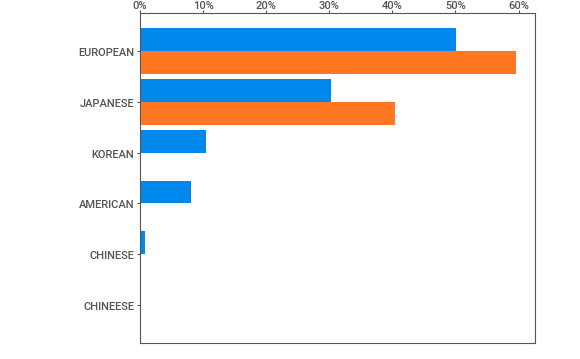
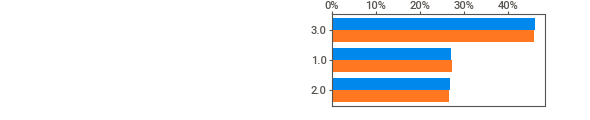
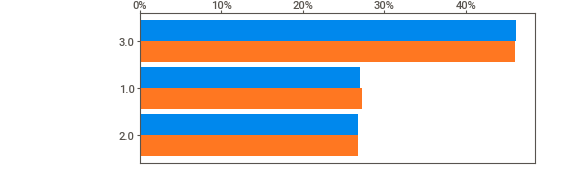
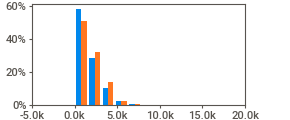
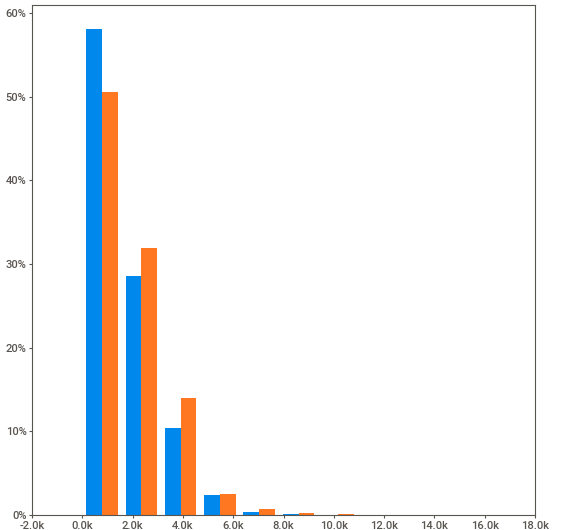
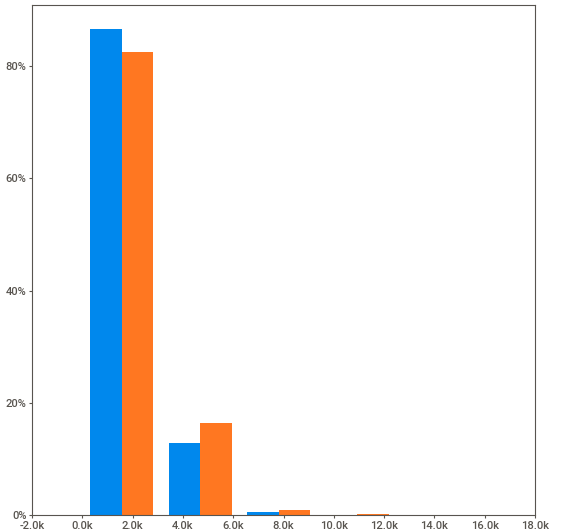
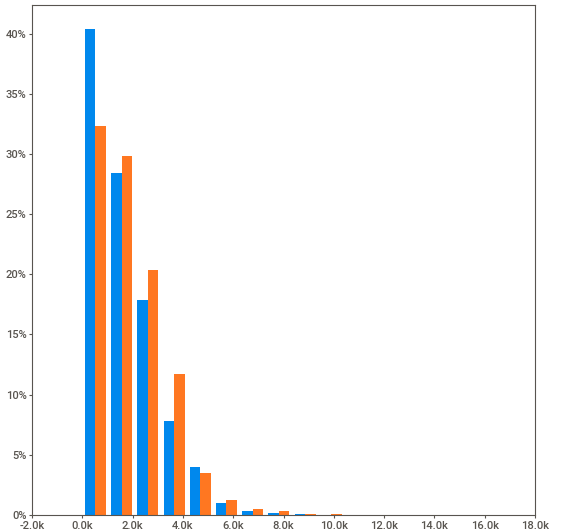
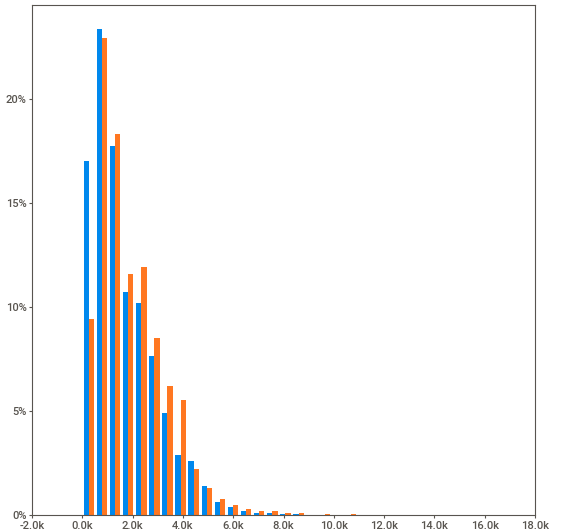
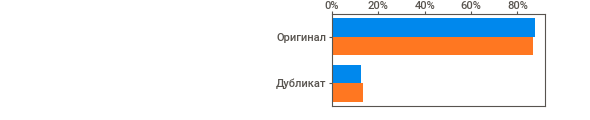
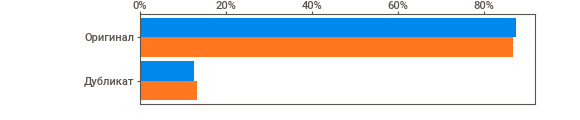
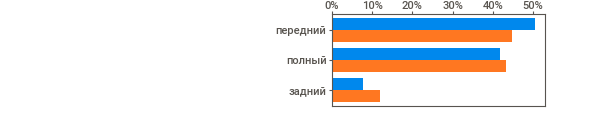
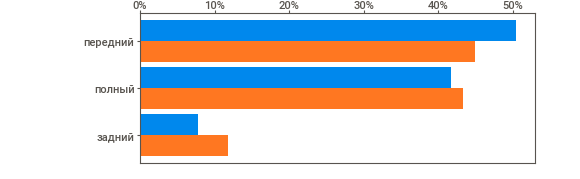
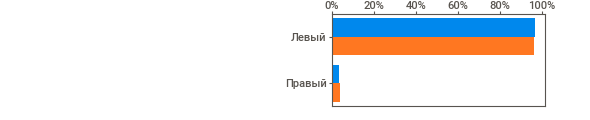
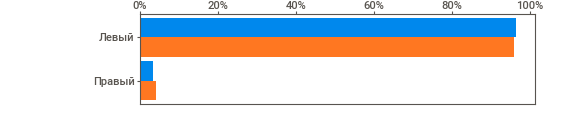
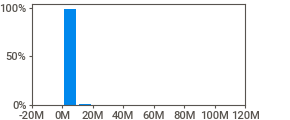
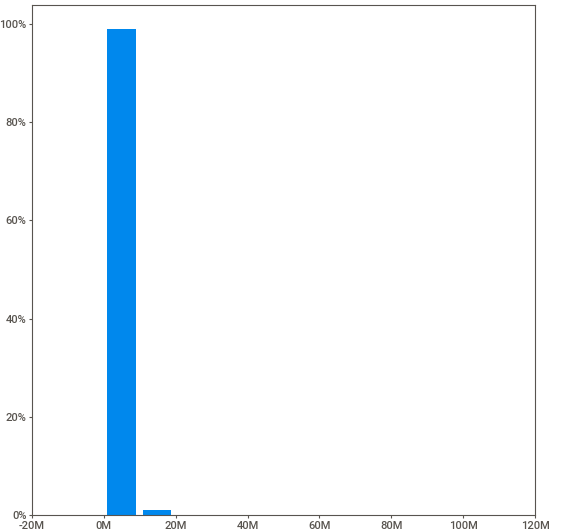
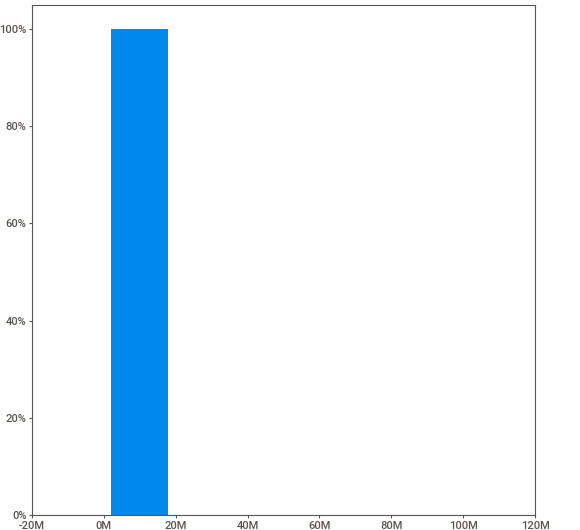
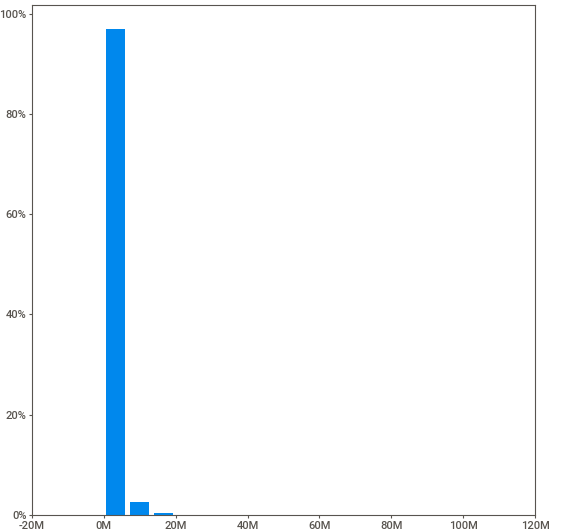
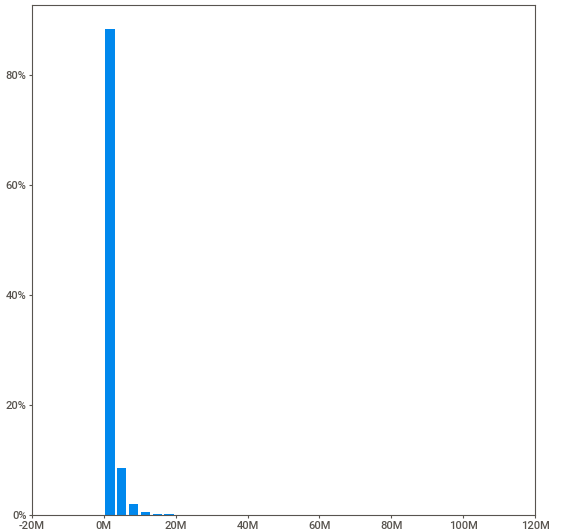
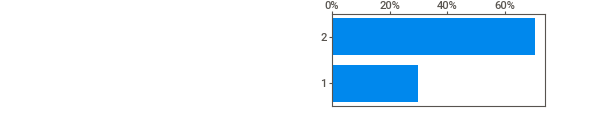
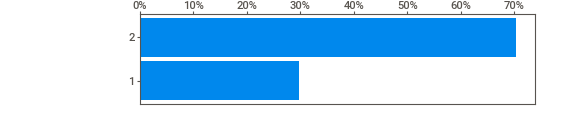
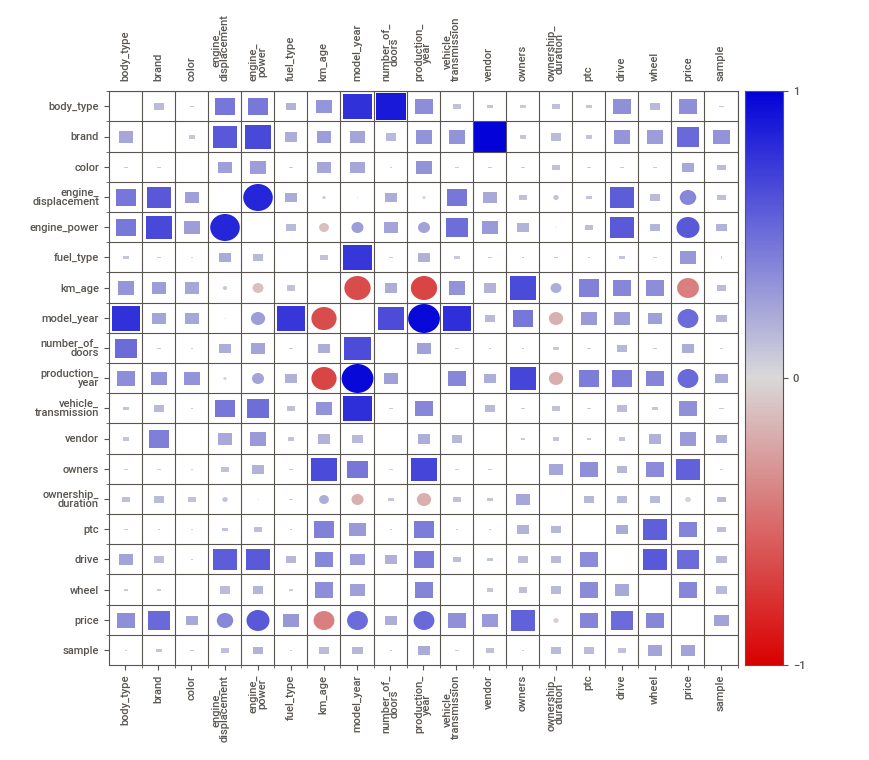
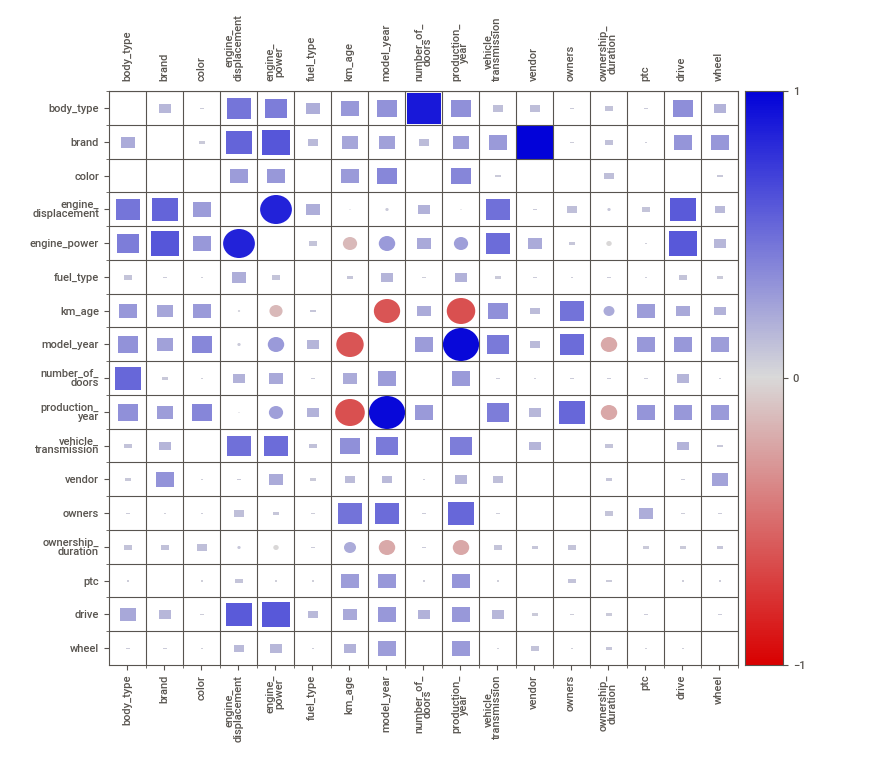

In [21]:
comp.show_notebook()

## Teatures TO DO

- **body_type** - fill na
- **brand** - 
- **color** - 
- **description** - 
- **engine_displacement** - 
- **engine_power** - 
- **fuel_type** - 
- **km_age** - 
- **model_year** - 
- **number_of_doors** - 
- **production_year** - 
- **vehicle_transmission** - 
- **vendor** - 
- **oweners** - 
- **owenership_duration** - 
- **ptc** - 
- **drive** - 
- **wheel** - 
- **price** - 

In [23]:
train.loc[train.body_type.isna()]

,body_type,brand,color,description,engine_displacement,engine_power,fuel_type,km_age,model_year,number_of_doors,production_year,vehicle_transmission,vendor,owners,ownership_duration,ptc,drive,wheel,price,sample
21830,NaN,HONDA,пурпурный,в хорошем состоянии на ходу,NaN,NaN,NaN,220000.0,NaN,NaN,1989.0,NaN,JAPANESE,3.0,NaN,Оригинал,NaN,Левый,110000.0,1
24624,NaN,HONDA,серый,"продаю honda civic suttle 1989 г. выпуска, неу...",NaN,NaN,универсал,400000.0,NaN,NaN,1989.0,NaN,JAPANESE,3.0,NaN,Оригинал,NaN,Левый,120000.0,2


In [25]:
train.body_type.value_counts(dropna=False)

внедорожник    48273
седан          40795
хэтчбек        12625
лифтбек         6089
универсал       4502
минивэн         2990
компактвэн      2554
купе            2103
пикап            803
кабриолет        242
родстер          194
фургон           175
микровэн          54
тарга              9
лимузин            7
фастбек            3
NaN                2
Name: body_type, dtype: int64

In [26]:
test.body_type.value_counts(dropna=False)

седан          13165
внедорожник    12346
хэтчбек         2609
лифтбек         2232
универсал       1276
минивэн          995
купе             982
компактвэн       489
пикап            290
родстер           99
фургон            97
кабриолет         90
микровэн           7
лимузин            6
тарга              2
фастбек            1
Name: body_type, dtype: int64